In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import NearestNeighbors

### The code used in this notebook has been referenced from ML Based Recommender Systems by Lillian Person

#### Movie Lens Dataset Backgorund
MovieLens data sets were collected by the GroupLens Research Project
at the University of Minnesota.
 
This data set consists of:
	* 100,000 ratings (1-5) from 943 users on 1682 movies. 
	* Each user has rated at least 20 movies. 
    * Simple demographic info for the users (age, gender, occupation, zip)


### load movie info into a dataframe

In [2]:
item_df = pd.read_csv('ml-100k/ml-movies.csv')
item_df.columns=['ItemId','Title','Genre']

In [3]:
item_df

,ItemId,Title,Genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


### user item information

In [5]:
user_item_df = pd.read_csv('./ml-100k/u.data', sep='\t',names=['UserID', 'ItemId', 'Rating', 'Timestamp'])

In [5]:
user_item_df.head()

,UserID,ItemId,Rating,Timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
user_item_df.shape

(100000, 4)

#### no of unique users and items

In [7]:
n_users = len(user_item_df['UserID'].unique())
print('no of unique users are: '+str(n_users))

no of unique users are: 943


In [8]:
n_items = len(user_item_df['ItemId'].unique())
print('no of unique items are: '+str(n_items))

no of unique items are: 1682


#### distribution of ratings given by users

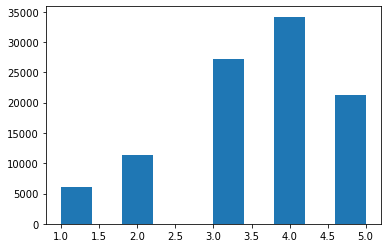

In [9]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.hist(user_item_df['Rating'])
plt.show()

#### check distribution of movie views

(array([1.146e+03, 2.490e+02, 1.390e+02, 6.700e+01, 3.800e+01, 2.400e+01,
        7.000e+00, 5.000e+00, 6.000e+00, 1.000e+00]),
 array([  1. ,  59.2, 117.4, 175.6, 233.8, 292. , 350.2, 408.4, 466.6,
        524.8, 583. ]),
 <BarContainer object of 10 artists>)

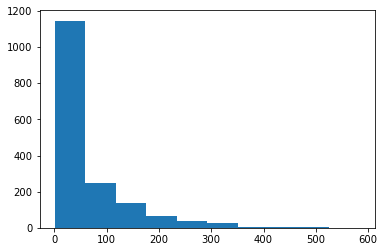

In [10]:
plt.hist(user_item_df.groupby(['ItemId'])['ItemId'].count()) 

#### create ratings df remov timestamp column

In [11]:
ratings_df = user_item_df.drop('Timestamp',axis=1)

In [12]:
ratings_df.head()

,UserID,ItemId,Rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


#### Create a Basic Popularity Based Recommendation System

In [13]:
rating_count = pd.DataFrame(ratings_df.groupby('ItemId')['Rating'].count())
rating_count.sort_values('Rating',ascending=False).head()

,Rating
ItemId,
50,583
258,509
100,508
181,507
294,485


In [14]:
most_rated_items = pd.DataFrame([50,258,100,181,294],index=np.arange(5),columns=['ItemId'])

In [15]:
pd.merge(most_rated_items,item_df,on='ItemId')

,ItemId,Title,Genre
0,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
1,258,"Kid in King Arthur's Court, A (1995)",Adventure|Children|Comedy|Fantasy|Romance
2,100,City Hall (1996),Drama|Thriller
3,181,Mighty Morphin Power Rangers: The Movie (1995),Action|Children
4,294,"Perez Family, The (1995)",Comedy|Romance


In [16]:
item_df['Genre'].describe()

count     27278
unique     1342
top       Drama
freq       4520
Name: Genre, dtype: object

#### Correlation based recomender system. 
Use PearsonR correlation

In [17]:
movie_ratings = pd.merge(item_df,user_item_df,on='ItemId')

In [18]:
movie_ratings

,ItemId,Title,Genre,UserID,Rating,Timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,308,4,887736532
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,287,5,875334088
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,148,4,877019411
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,280,4,891700426
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,66,3,883601324
...,...,...,...,...,...,...
98674,1678,"Joy Luck Club, The (1993)",Drama|Romance,863,1,889289570
98675,1679,Chairman of the Board (1998),Comedy,863,3,889289491
98676,1680,Sliding Doors (1998),Drama|Romance,863,2,889289570
98677,1681,Mortal Kombat: Annihilation (1997),Action|Adventure|Fantasy,896,3,887160722


In [19]:
movie_ratings= pd.DataFrame(movie_ratings.groupby(['ItemId'])['Rating'].mean())

In [20]:
movie_ratings.reset_index(inplace=True)

In [21]:
movie_ratings['Rating_Count'] = pd.DataFrame(movie_ratings.groupby(['ItemId'])['Rating'].count())

In [22]:
movie_ratings

,ItemId,Rating,Rating_Count
0,1,3.878319,NaN
1,2,3.206107,1.0
2,3,3.033333,1.0
3,4,3.550239,1.0
4,5,3.302326,1.0
...,...,...,...
1621,1678,1.000000,1.0
1622,1679,3.000000,1.0
1623,1680,2.000000,1.0
1624,1681,3.000000,1.0


In [23]:
movie_ratings.describe()

,ItemId,Rating,Rating_Count
count,1626.000000,1626.000000,1572.0
mean,830.150677,3.079570,1.0
std,484.330820,0.781246,0.0
min,1.000000,1.000000,1.0
25%,410.250000,2.661950,1.0
50%,827.500000,3.166667,1.0
75%,1246.750000,3.654371,1.0
max,1682.000000,5.000000,1.0


In [24]:
movie_ratings.sort_values('Rating_Count',ascending=False).head()

,ItemId,Rating,Rating_Count
1,2,3.206107,1.0
1078,1100,2.625000,1.0
1076,1098,3.690476,1.0
1075,1097,3.500000,1.0
1073,1095,2.620690,1.0


### create dataframe from analysis

In [25]:
ratings_df

,UserID,ItemId,Rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
...,...,...,...
99995,880,476,3
99996,716,204,5
99997,276,1090,1
99998,13,225,2


In [26]:
movies_crosstab = pd.pivot_table(data=ratings_df,values='Rating',index='UserID',columns='ItemId')

In [27]:
movies_crosstab

ItemId,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
UserID,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
item_df[item_df['ItemId']==1]

,ItemId,Title,Genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [29]:
toy_story_ratings = movies_crosstab[1]

In [31]:
toy_story_ratings[0:20]

UserID
1     5.0
2     4.0
3     NaN
4     NaN
5     4.0
6     4.0
7     NaN
8     NaN
9     NaN
10    4.0
11    NaN
12    NaN
13    3.0
14    NaN
15    1.0
16    5.0
17    4.0
18    5.0
19    NaN
20    3.0
Name: 1, dtype: float64

In [32]:
similar_to_toy_story = movies_crosstab.corrwith(toy_story_ratings)

C:\Users\Arunabh\miniconda3\envs\tensorflow\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Arunabh\miniconda3\envs\tensorflow\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [33]:
corr_toy_story = pd.DataFrame(similar_to_toy_story,columns=['PearsonR'])

In [34]:
corr_toy_story.dropna(inplace=True)

In [35]:
corr_toy_story.head()

,PearsonR
ItemId,
1,1.000000
2,0.221784
3,0.175794
4,0.103135
5,0.386475


### lets have a look at suggestions given by the recommender

In [36]:
item_df[item_df['ItemId']==5]

,ItemId,Title,Genre
4,5,Father of the Bride Part II (1995),Comedy


In [39]:
item_df[item_df['ItemId']==4]

,ItemId,Title,Genre
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance


## model based recommendation

SVD Matrix Factorization

#### preparing the data

In [40]:
columns = ['user_id', 'item_id', 'rating', 'timestamp']
frame = pd.read_csv('ml-100k/u.data', sep='\t', names=columns)
frame.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [41]:
columns = ['item_id', 'movie title', 'release date', 'video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
          'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
          'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

movies = pd.read_csv('ml-100k/u.item', sep='|', names=columns, encoding='latin-1')
movie_names = movies[['item_id', 'movie title']]
movie_names.head()

,item_id,movie title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [42]:
combined_movies_data = pd.merge(frame, movie_names, on='item_id')
combined_movies_data.head()

,user_id,item_id,rating,timestamp,movie title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


#### get info on most rated movies

In [43]:
combined_movies_data.groupby('item_id')['rating'].count().sort_values(ascending=False).head()

item_id
50     583
258    509
100    508
181    507
294    485
Name: rating, dtype: int64

Find name of the movie rated by most users

In [44]:
filter = combined_movies_data['item_id']==50
combined_movies_data[filter]['movie title'].unique()

array(['Star Wars (1977)'], dtype=object)

### Building a Utility Matrix

A utility matrix provides a mtrix of all users and all movies with ratings in spcific indices. This is a very sparse matrix as every user only rates a few of the overall list of movies.

In [45]:
rating_crosstab = combined_movies_data.pivot_table(values='rating', index='user_id', columns='movie title', fill_value=0)
rating_crosstab.head()

movie title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,2,5,0,0,3,4,0,0,...,0,0,0,5,3,0,0,0,4,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,2,0,0,0,0,4,0,0,...,0,0,0,4,0,0,0,0,4,0


### Understanding Truncated SVD

<img src="truncated_svd.png">

In [46]:
print(rating_crosstab.shape)
X = rating_crosstab.T
X.shape

(943, 1664)


(1664, 943)

#### Decomposing the Matrix to 12 Components

In [47]:
SVD = TruncatedSVD(n_components=12, random_state=17)

resultant_matrix = SVD.fit_transform(X)

resultant_matrix.shape

(1664, 12)

### Why 12?
12 is a hyperparameter which can be tuned to see how the recommender system performs

### Generating a Correlation Matrix

In [48]:
corr_mat = np.corrcoef(resultant_matrix)
corr_mat.shape

(1664, 1664)

In [50]:
movie_names = rating_crosstab.columns
movies_list = list(movie_names)

star_wars = movies_list.index('Star Wars (1977)')
star_wars

1398

In [54]:
corr_star_wars = corr_mat[1398]
corr_star_wars.shape

(1664,)

### Generating a Correlation Matrix

In [55]:
list(movie_names[(corr_star_wars<0.95) & (corr_star_wars > 0.8)])


['2001: A Space Odyssey (1968)',
 'Akira (1988)',
 'Aladdin (1992)',
 'Alien (1979)',
 'Aliens (1986)',
 'Apollo 13 (1995)',
 'Babe (1995)',
 'Back to the Future (1985)',
 'Bad Boys (1995)',
 'Batman (1989)',
 'Batman Returns (1992)',
 'Blade Runner (1982)',
 'Blues Brothers, The (1980)',
 'Braveheart (1995)',
 'Conan the Barbarian (1981)',
 'Crimson Tide (1995)',
 'Crow, The (1994)',
 'Demolition Man (1993)',
 'Desperado (1995)',
 'Die Hard (1988)',
 'Die Hard: With a Vengeance (1995)',
 'E.T. the Extra-Terrestrial (1982)',
 'Empire Strikes Back, The (1980)',
 'Fargo (1996)',
 'Fifth Element, The (1997)',
 'Fugitive, The (1993)',
 'Full Metal Jacket (1987)',
 'Get Shorty (1995)',
 'Glory (1989)',
 'Godfather, The (1972)',
 'GoldenEye (1995)',
 'Good, The Bad and The Ugly, The (1966)',
 'Groundhog Day (1993)',
 'Highlander (1986)',
 'Hunt for Red October, The (1990)',
 'In the Line of Fire (1993)',
 'Independence Day (ID4) (1996)',
 'Indiana Jones and the Last Crusade (1989)',
 "Jackie